In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

graphics_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/ND examples/Hidden nodes"

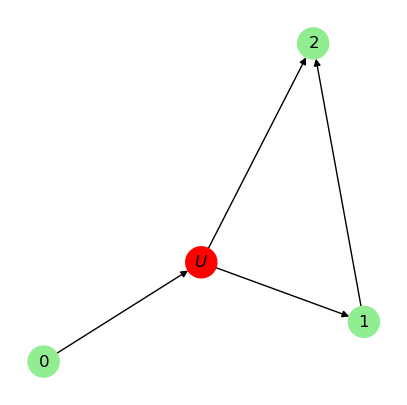

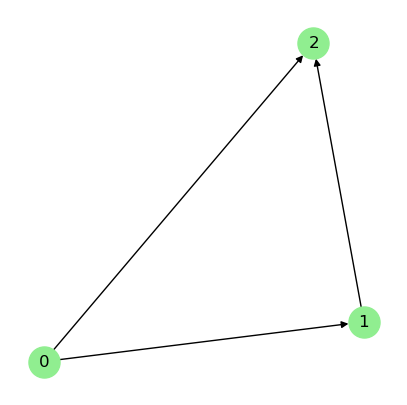

In [70]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


# Directed graph from initial correlation structure (non-symmetric)
G = np.array([[0,1,0,0],
              [0,0,1,1],
              [0,0,0,1],
              [0,0,0,0]])
gr = nx.from_numpy_array(G, create_using = nx.DiGraph)
pos = graphviz_layout(gr)

# nx.draw(gr, pos=pos, node_size = 500, with_labels = True, nodelist=[i for i in range(4)] , ax = ax.flat[0], node_color='lightgreen')
labels = {}
labels[0] = r"$0$"
labels[1] = r"$U$"
labels[2] = r"$1$"
labels[3] = r"$2$"
nx.draw(gr, pos=pos, node_size = 500, ax = ax, node_color=['lightgreen', 'red','lightgreen','lightgreen' ])
nx.draw_networkx_labels(gr, pos = pos, labels=labels,  ax = ax)

plt.savefig(graphics_path + "/graph example w hidden.pdf", bbox_inches='tight')
plt.savefig(graphics_path + "/graph example w hidden", bbox_inches='tight')





# Directed graph from initial correlation structure (non-symmetric)
fig, ax = plt.subplots(1,1,figsize=(5,5))

G = np.array([[0,1,1],
              [0,0,1],
              [0,0,0]])
gr = nx.from_numpy_array(G, create_using = nx.DiGraph)
# pos = graphviz_layout(gr)
pos = { idx:pos[i] for idx, i in enumerate([0,2,3])}

# nx.draw(gr, pos=pos, node_size = 500, with_labels = True, nodelist=[i for i in range(4)] , ax = ax.flat[0], node_color='lightgreen')
labels = {}
labels[0] = r"$0$"
labels[1] = r"$1$"
labels[2] = r"$2$"
nx.draw(gr, pos=pos, node_size = 500, ax = ax, node_color='lightgreen')
nx.draw_networkx_labels(gr, pos = pos, labels=labels,  ax = ax)

plt.savefig(graphics_path + "/graph example wo hidden.pdf", bbox_inches='tight')
plt.savefig(graphics_path + "/graph example wo hidden", bbox_inches='tight')

{0: Text(27.0, 666.0, '$1$'),
 1: Text(27.0, 594.0, '$2$'),
 2: Text(27.0, 522.0, '$3$'),
 3: Text(27.0, 450.0, '$4$'),
 4: Text(27.0, 378.0, '$5$'),
 5: Text(27.0, 306.0, '$6$'),
 6: Text(27.0, 234.0, '$7$'),
 7: Text(27.0, 162.0, '$8$'),
 8: Text(27.0, 90.0, '$9$'),
 9: Text(27.0, 18.0, '$10$')}

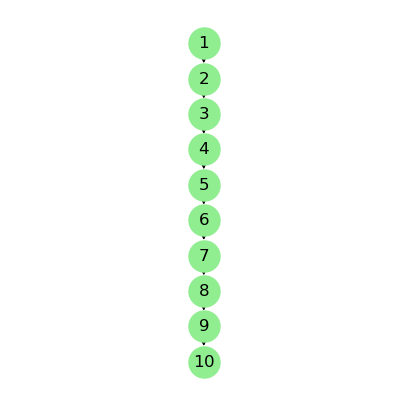

In [16]:
# fig, ax = plt.subplots(1,1,figsize=(5,5))


# # Directed graph from initial correlation structure (non-symmetric)
# G = np.array([[0,1,0,0],
#               [0,0,1,0],
#               [0,0,0,1],
#               [0,0,0,0]])
# gr = nx.from_numpy_array(G, create_using = nx.DiGraph)
# pos = graphviz_layout(gr)

# # nx.draw(gr, pos=pos, node_size = 500, with_labels = True, nodelist=[i for i in range(4)] , ax = ax.flat[0], node_color='lightgreen')
# labels = {}
# labels[0] = r"$0$"
# labels[1] = r"$U$"
# labels[2] = r"$1$"
# labels[3] = r"$2$"
# nx.draw(gr, pos=pos, node_size = 500, ax = ax, node_color=['lightgreen', 'red','lightgreen','lightgreen' ])
# nx.draw_networkx_labels(gr, pos = pos, labels=labels,  ax = ax)

# # plt.savefig(graphics_path + "/graph example w hidden.pdf", bbox_inches='tight')
# # plt.savefig(graphics_path + "/graph example w hidden", bbox_inches='tight')





# Directed graph from initial correlation structure (non-symmetric)
fig, ax = plt.subplots(1,1,figsize=(5,5))

# G = np.array([[0,1,0],
#               [0,0,1],
#               [0,0,0]])
G = np.eye(10, k = 1)
gr = nx.from_numpy_array(G, create_using = nx.DiGraph)
pos = graphviz_layout(gr, prog="dot" )
# pos = { idx:pos[i] for idx, i in enumerate([0,2,3])}

# nx.draw(gr, pos=pos, node_size = 500, with_labels = True, nodelist=[i for i in range(4)] , ax = ax.flat[0], node_color='lightgreen')
labels = {}
for i in range(10):
    labels[i] = rf"${i+1}$"
nx.draw(gr, pos = pos, node_size = 500, ax = ax, node_color='lightgreen')
nx.draw_networkx_labels(gr, pos = pos, labels=labels,  ax = ax)

# plt.savefig(graphics_path + "/graph example wo hidden.pdf", bbox_inches='tight')
# plt.savefig(graphics_path + "/graph example wo hidden", bbox_inches='tight')

In [6]:
np.eye(10, k = 1)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
n_boot = 100000

cor_samples = np.full(n_boot, np.nan)

n_samples = 1000
for i in tqdm(range(n_boot)):
    U1 = scipy.stats.uniform.rvs(0,1,n_samples)
    U2 = -4*(U1-0.5)**2 + 1 + scipy.stats.norm.rvs(size = U1.__len__())*0.1
    # plt.scatter(U1,U2, s = 0.3, c = "black")

    cor_samples[i] = np.corrcoef(U1,U2)[0,1]

100%|██████████| 100000/100000 [00:29<00:00, 3372.86it/s]


(-0.07632441636658978, 0.07602306767389447)

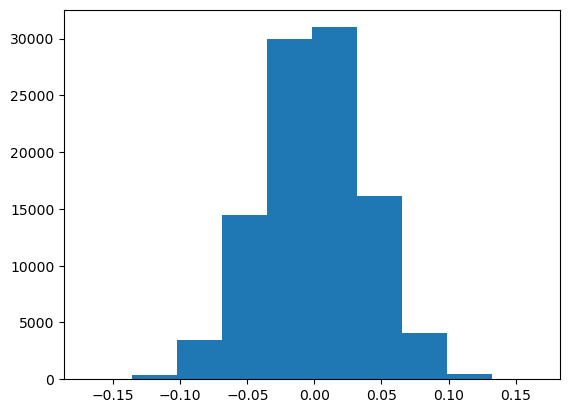

In [26]:
plt.hist(cor_samples)

np.quantile(cor_samples, 0.025), np.quantile(cor_samples, 0.975)

In [27]:
# cor_samples.mean() + np.array([-1,1]) * scipy.stats.t.ppf(0.975, df = 1000 - 1) * cor_samples.var(ddof = 1)**0.5
CI = np.array([-1,1]) * scipy.stats.t.ppf(0.975, df = n_samples - 1)
CI = CI / (n_samples - 2 + CI**2)**0.5
CI

array([-0.06199734,  0.06199734])

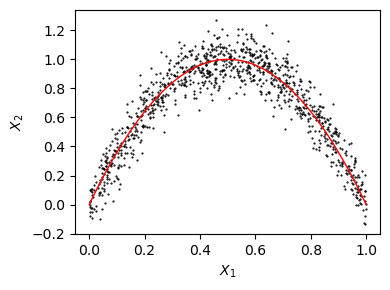

In [116]:
U1 = scipy.stats.uniform.rvs(0,1,n_samples)
U2 = -4*(U1-0.5)**2 + 1 + scipy.stats.norm.rvs(size = U1.__len__())*0.1


plt.figure(figsize=(4,3))
plt.scatter(U1,U2, s = 0.3, c = "black")

x1 = np.linspace(0,1,1000)
x2 = 1 - 4 * (x1-0.5)**2

plt.plot(x1,x2, c="red",linewidth=1)

plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

plt.tight_layout()

plt.savefig

graphics_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/Mutual information figures"
plt.savefig(graphics_path + "/parabola example", bbox_inches='tight')
plt.savefig(graphics_path + "/parabola example.pdf", bbox_inches='tight')

In [96]:
def f_parabola(x,y,sigma):
    return 1/np.sqrt(2*np.pi) / sigma * np.exp(-0.5 * (y - 4*(x-0.5)**2)**2 / sigma**2)

def f_parabola_log(x,y,sigma):
    return np.log(1/np.sqrt(2*np.pi) / sigma) -0.5 * (y - 4*(x-0.5)**2)**2 / sigma**2

def f_x_parabola(x,y,sigma):
    return 1/np.sqrt(2*np.pi) / sigma * np.exp(-0.5 * (y - 4*(x-0.5)**2)**2 / sigma**2).sum(axis = 0)

def f_y_parabola(x,y,sigma):
    return 1/np.sqrt(2*np.pi) / sigma * np.exp(-0.5 * (y - 4*(x-0.5)**2)**2 / sigma**2).sum(axis = 1)

In [111]:
sigma = 0.1
nx,ny = 2000, 2000
xx,yy = np.meshgrid(np.linspace(0,1,nx), np.linspace(-2,4,ny))

dx = 1/nx
dy = 6/ny

(f_y_parabola(xx,yy,sigma) * dx).sum() * dy

Hy = -(f_y_parabola(xx,yy,sigma) * dx * np.log(f_y_parabola(xx,yy,sigma) * dx)).sum() * dy
Hx = 0
Hxy = -( f_parabola(xx,yy,sigma)  * f_parabola_log(xx,yy,sigma) ).sum()* dx*dy
MI = Hx + Hy - Hxy

In [112]:
MI

1.0296516475133333

In [104]:
Hy

0.7618186365772687